In [1]:
# initialize accelerator and trackers (if enabled)
from os import makedirs, path, scandir
import pickle
import cv2
import json
from yacs.config import CfgNode as CN
from torch.utils.data import Dataset
from tqdm import tqdm
import logging
import random
import torch
# from src.datasets import FFPP,RPPG
from accelerate import Accelerator
from main import get_config, init_accelerator, set_seed, FFPP
logging.basicConfig(level="DEBUG")


class Obj:
    pass


c = FFPP.get_default_config()
c.augmentation = "normal+frame"
# c.pair = 1
c.contrast = 1
c.compressions = ["c23"]
c.ssl_fake = 1
c.types = ["REAL", "DF", "FS", "F2F"]
# c.types = ["DF", "FS", "F2F"]
accelerator = Accelerator(mixed_precision='no')
x = FFPP(c, 20, 5, lambda x: x, accelerator, split="train")
c

100%|██████████| 4/4 [00:00<00:00, 2706.88it/s]
/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


CfgNode({'category': 'train', 'root_dir': './datasets/ffpp/', 'detection_level': 'video', 'types': ['REAL', 'DF', 'FS', 'F2F'], 'compressions': ['c23'], 'name': 'FFPP', 'scale': 1.0, 'pack': 0, 'pair': 0, 'contrast': 1, 'ssl_fake': 1, 'augmentation': ['normal', 'frame'], 'random_speed': 1})

In [2]:
typ, cmp, idx, _ = x.video_list[0]
x.video_table[typ][cmp][idx]

{'fps': 30,
 'frames': 453,
 'duration': 15.1,
 'path': './datasets/ffpp/real/c23/videos/071.avi'}

In [3]:
# a = x.get_dict(7079, True)

In [4]:
len(x)

8864

In [13]:
frames, label, mask, _, _ = x[random.randint(0, len(x))]
(len(frames), len(label), len(mask))

DEBUG:root:Item/Video Index:1919/584
DEBUG:root:Item DF/COMP:REAL/c23
DEBUG:root:Video Speed Motion Factor: 0.9539148293133621
DEBUG:root:Video Shift Factor: 0.026346331001441653
DEBUG:root:Loading Video: ./datasets/ffpp/real/c23/videos/965.avi
DEBUG:root:Sample Offset: 5
DEBUG:root:Sample Stride: 0.24912280701754386
DEBUG:root:Augmentations Applied.
DEBUG:root:Video: ./datasets/ffpp/real/c23/videos/965.avi, Completed!
DEBUG:root:Random SSL Fake Samples Creating...
DEBUG:root:Item/Video Index:1919/584
DEBUG:root:Item DF/COMP:REAL/c23
DEBUG:root:Video Speed Motion Factor: 0.9431158329511375
DEBUG:root:Video Shift Factor: 0.041132903237870055
DEBUG:root:Loading Video: ./datasets/ffpp/real/c23/videos/965.avi
DEBUG:root:Sample Offset: 5
DEBUG:root:Sample Stride: 0.24561403508771928
DEBUG:root:Augmentations Applied.
DEBUG:root:SSL Make Fake Applied.
DEBUG:root:Video: ./datasets/ffpp/real/c23/videos/965.avi, Completed!


(2, 2, 2)

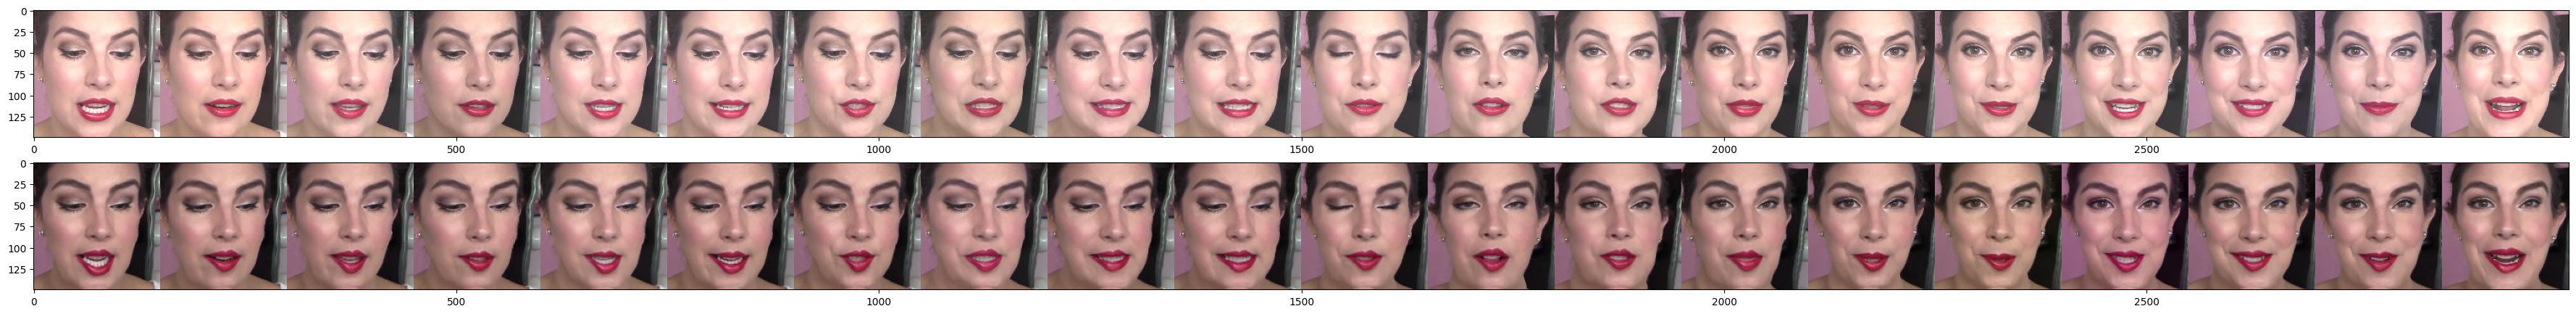

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 5))
plt.subplot(2, 1, 1)
plt.imshow(
    np.stack(
        frames[0]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)
plt.subplot(2, 1, 2)
plt.imshow(
    np.stack(
        frames[1]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)

In [ ]:
# for i in tqdm(range(len(x))):
#     try:
#         x[i]
#     except Exception as e:
#         print(f"Error Occur at {i}:{e}")